**Лабораторная работа №2**

Ипатов Вадим 2371

 Ссылка на датасет: https://www.kaggle.com/datasets/shivam2503/diamonds

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [6]:
df = pd.read_csv('/Users/vadimipatov/Desktop/машинка фарид/diamonds.csv')

In [7]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Добавим новый атрибут в наш датасет.

Сделаем атрибут цены одного карата для каждого бриллианта 

Формула: price_of_carat = price / carat

In [9]:
df['price_of_carat'] = df['price'] / df['carat']

In [10]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,price_of_carat
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161


**"Причешем" наш датасет**

**Заменим все строковые атрибуты на числовые**

In [107]:
class_col = 'cut'
category_cols = ['color', 'clarity']
dict_ = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
dict_2 = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
dict_3 = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
df[class_col] = df[class_col].replace(dict_)
df[category_cols[0]] = df[category_cols[0]].replace(dict_2)
df[category_cols[1]] = df[category_cols[1]].replace(dict_3)

Проверим наличие пропущенных значений и поймем, что их нет 

In [108]:
df.isnull().sum()

Unnamed: 0        0
carat             0
cut               0
color             0
clarity           0
depth             0
table             0
price             0
x                 0
y                 0
z                 0
price_of_carat    0
dtype: int64

In [109]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,price_of_carat
0,1,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43,1417.391304
1,2,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31,1552.380952
3,4,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63,1151.724138
4,5,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75,1080.645161
5,6,0.24,2,0,5,62.8,57.0,336,3.94,3.96,2.48,1400.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,4,6,2,60.8,57.0,2757,5.75,5.76,3.50,3829.166667
53936,53937,0.72,1,6,2,63.1,55.0,2757,5.69,5.75,3.61,3829.166667
53937,53938,0.70,2,6,2,62.8,60.0,2757,5.66,5.68,3.56,3938.571429
53938,53939,0.86,3,2,1,61.0,58.0,2757,6.15,6.12,3.74,3205.813953


**Удалим все выбросы с помощью zscore**

In [113]:

numeric_cols = df.select_dtypes(include=['number']).columns  

for col in numeric_cols:
    z_scores = stats.zscore(df[col])
    df = df[(z_scores > -3) & (z_scores < 3)] 

In [112]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,price_of_carat
0,1,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43,1417.391304
1,2,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31,1552.380952
3,4,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63,1151.724138
4,5,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75,1080.645161
5,6,0.24,2,0,5,62.8,57.0,336,3.94,3.96,2.48,1400.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,4,6,2,60.8,57.0,2757,5.75,5.76,3.50,3829.166667
53936,53937,0.72,1,6,2,63.1,55.0,2757,5.69,5.75,3.61,3829.166667
53937,53938,0.70,2,6,2,62.8,60.0,2757,5.66,5.68,3.56,3938.571429
53938,53939,0.86,3,2,1,61.0,58.0,2757,6.15,6.12,3.74,3205.813953


**Найдем дубликаты, их не оказалось**

In [114]:
duplicates = df.duplicated()
num_duplicates = duplicates.sum()

In [115]:
num_duplicates


np.int64(0)

**Найдем количество кластеров с помощью метода локтя**

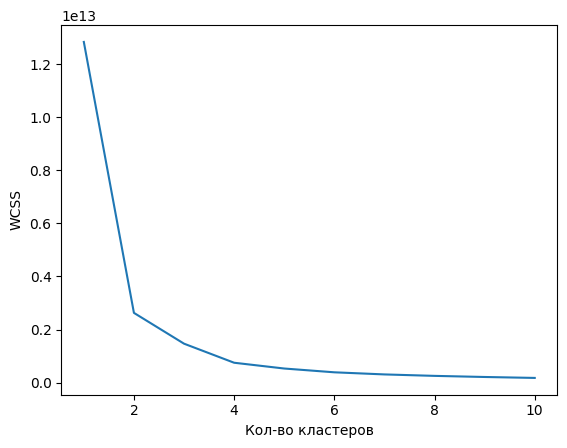

In [168]:
X =df.values[:]
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.xlabel('Кол-во кластеров')
plt.ylabel('WCSS')
plt.show()

**Применим метод KMeans к нашим данным, указав что кластеров у нас 2**

In [162]:
X =df.values[:]
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(X)
cluster_labels = kmeans.labels_


**Построим графики зависимости атрибутов с помощью plt.scatter**

Text(0, 0.5, 'price')

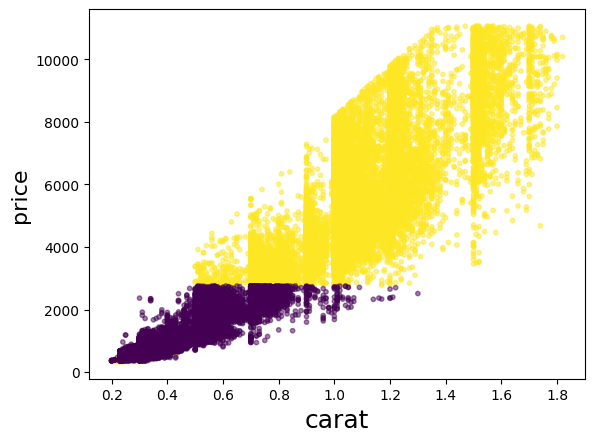

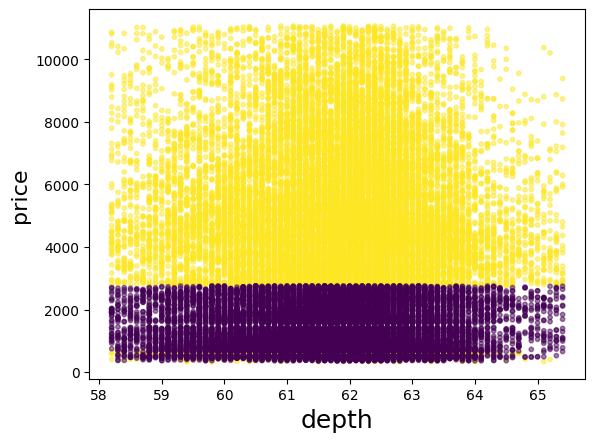

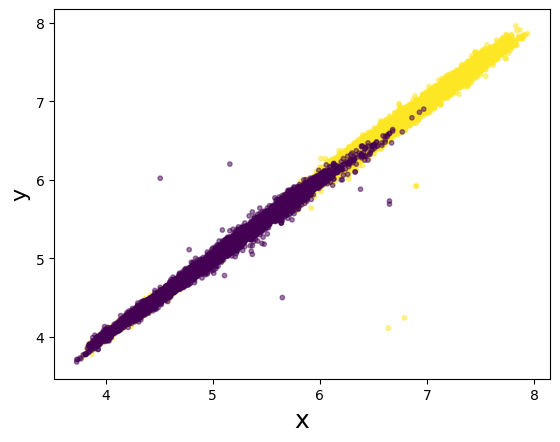

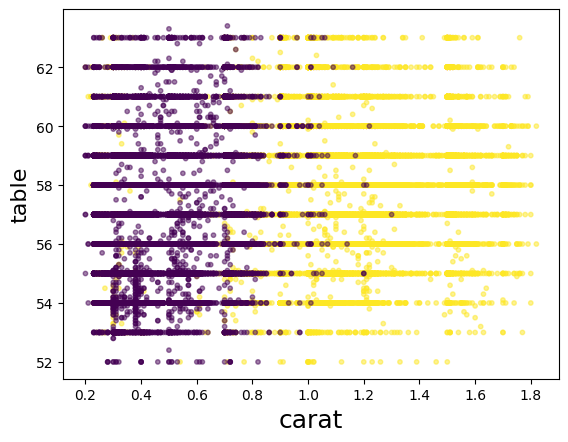

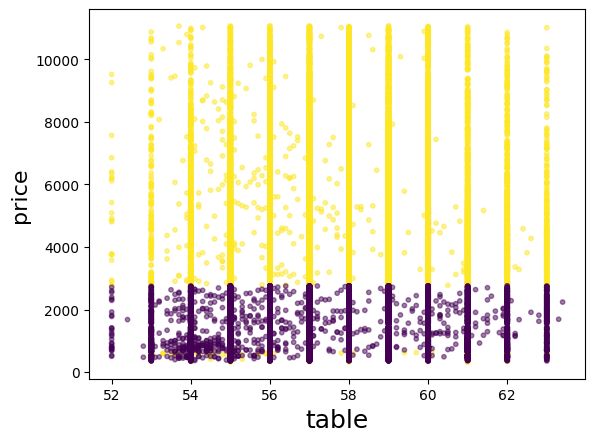

In [174]:
plt.figure()
plt.scatter(X[:, 1], X[:, 7], c=cluster_labels, s=10, alpha=0.5)
plt.xlabel('carat', fontsize=18)
plt.ylabel('price', fontsize=16)

plt.figure()
plt.scatter(X[:, 5], X[:, 7], c=cluster_labels, s=10, alpha=0.5)
plt.xlabel('depth', fontsize=18)
plt.ylabel('price', fontsize=16)

plt.figure()
plt.scatter(X[:, 8], X[:, 9], c=cluster_labels, s=10, alpha=0.5)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=16)

plt.figure()
plt.scatter(X[:, 1], X[:, 6], c=cluster_labels, s=10, alpha=0.5)
plt.xlabel('carat', fontsize=18)
plt.ylabel('table', fontsize=16)

plt.figure()
plt.scatter(X[:, 6], X[:, 7], c=cluster_labels, s=10, alpha=0.5)
plt.xlabel('table', fontsize=18)
plt.ylabel('price', fontsize=16)


**Вывод:**

Мы построили несколько графиков зависимостей нашего датасета и можем сказать, что у нас есть два кластера. И мы можем это хорошо увидеть графике зависимости карат от цены, где чем больше карат, тем больше цена. Также мы можем сказать, что цена не зависит от глубины бриллинта. На графике зависимости x от y мы можем увидеть, что чем больше бриллиант, тем он дороже. 